# Iris Keras

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
import tensorflow
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0



## Keras

In [3]:
from ibex.tensorflow.contrib.keras.wrappers.scikit_learn import KerasClassifier as PdKerasClassifier

In [4]:
def buid_nn():
    np.random.seed(7)
    model = tensorflow.contrib.keras.models.Sequential()
    model.add(tensorflow.contrib.keras.layers.Dense(8, input_dim=4, activation='relu'))
    model.add(tensorflow.contrib.keras.layers.Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

buid_nn()

In [5]:
estimator = PdKerasClassifier(build_fn=buid_nn, classes=iris['class'].unique(), epochs=200, batch_size=5, verbose=0)

In [6]:
estimator.fit(iris[features], iris['class']).score(iris[features], iris['class'])

0.97333333333333338

In [7]:
from sklearn import metrics

In [8]:
kfold = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(estimator, iris[features], iris['class'], cv=kfold)
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.93333333,
        1.        ,  1.        ,  0.93333333,  1.        ,  1.        ])

In [9]:
np.mean(scores)

0.98000000000000009

Now that all the data is in a ``DataFrame``, we can use the ``feature_importances_`` attribute of a gradient boosting classifier. Note that in Ibex, this is a ``pandas.Series``.

In [3]:
pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_

sepal length (cm)    0.078549
sepal width (cm)     0.104726
petal length (cm)    0.295431
petal width (cm)     0.447961
dtype: float64

Since the result is a ``Series``, we can use its ``plot`` method directly, and it will handle all labels for us.

In [3]:
from ibex.sklearn import ensemble as pd_ensemble

In [12]:
estimator = pd_ensemble.AdaBoostClassifier()

In [13]:
(estimator.fit(iris[features], iris['class']).predict(iris[features]) == iris['class']).mean()

0.95999999999999996

In [14]:
kfold = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(estimator, iris[features], iris['class'], cv=kfold)
scores

array([ 1.        ,  0.93333333,  0.93333333,  1.        ,  0.93333333,
        1.        ,  1.        ,  0.86666667,  0.86666667,  0.93333333])

In [15]:
np.mean(scores)

0.94666666666666666

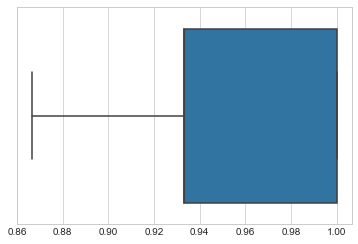

In [16]:
sns.boxplot(x=scores);

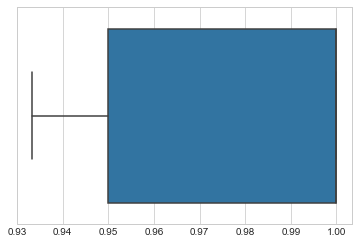

In [10]:
sns.boxplot(x=scores);